# Regression with Machine Learning
Guns is a balanced panel of data on 50 US states, plus the District of Columbia (for a total of 51 “states”), by year for 1977 – 1999. Each observation is a given state in a given 
year. There are a total of 51 states × 23 years = 1173 observations. These data were provided by Professor John Donohue of Stanford University and were used in his paper 
with Ian Ayres “Shooting Down the ‘More Guns Less Crime’ Hypothesis” Stanford Law Review, 2003, Vol. 55, 1193-1312.

Variables:

`year`: 1977-1999

`incarc_rate`: incarceration rate in the state in the previous year (sentenced prisoners per 100,000 residents; value for the previous year)

`pb1064`: percent of state population that is black, ages 10 to 64

`pw1064`: percent of state population that is white, ages 10 to 64

`pm1029`: percent of state population that is male, ages 10 to 29

`pop`: state population, in millions of people

`avginc`: real per capita personal income in the state, in thousands of dollars

`density`: population per square mile of land area, divided by 1000

`stateid`: ID number of states (Alabama = 1, Alaska = 2, etc.)

[Stock and Watson’s Introduction to Econometrics, 3rd Updated Edition]

In [32]:
import pandas as pd
df = pd.read_csv('violent_crimes.csv')
df.head()

,vio,year,incarc_rate,pb1064,pw1064,pm1029,pop,avginc,density,stateid,shall
0,414.4,77,83,8.384873,55.12291,18.17441,3.780403,9.563148,0.074552,1,0
1,419.1,78,94,8.352101,55.14367,17.99408,3.831838,9.932000,0.075567,1,0
2,413.3,79,144,8.329575,55.13586,17.83934,3.866248,9.877028,0.076245,1,0
3,448.5,80,141,8.408386,54.91259,17.73420,3.900368,9.541428,0.076829,1,0
4,470.5,81,149,8.483435,54.92513,17.67372,3.918531,9.548351,0.077187,1,0


https://medium.com/value-stream-design/online-machine-learning-515556ff72c5

Usual starting point is the SGDRegressor class.

In [62]:
import numpy as np
from sklearn import linear_model
y = df['vio'] # violent crime rate (incidents per 100,000 members of the population)
X = df.iloc[:,1:]
#X = df.iloc[:,1:2+1];
print(X.head())
n_samples, n_features = y.shape[0], X.shape[1]
clf = linear_model.SGDRegressor()
clf.fit(X, y)

   year  incarc_rate    pb1064    pw1064    pm1029       pop    avginc  \
0    77           83  8.384873  55.12291  18.17441  3.780403  9.563148   
1    78           94  8.352101  55.14367  17.99408  3.831838  9.932000   
2    79          144  8.329575  55.13586  17.83934  3.866248  9.877028   
3    80          141  8.408386  54.91259  17.73420  3.900368  9.541428   
4    81          149  8.483435  54.92513  17.67372  3.918531  9.548351   

    density  stateid  shall  
0  0.074552        1      0  
1  0.075567        1      0  
2  0.076245        1      0  
3  0.076829        1      0  
4  0.077187        1      0  


SGDRegressor()

The fit() method does all the training magic, resulting in a model we can use for prediction:

In [63]:
fp = df.iloc[-1] # features previous
print(fp)

vio            232.300000
year            99.000000
incarc_rate    327.000000
pb1064           1.613004
pw1064          74.049520
pm1029          15.480130
pop              0.479602
avginc          15.765070
density          0.004939
stateid         56.000000
shall            1.000000
Name: 1172, dtype: float64


In [64]:
features = np.array([[fp.year+1, fp.incarc_rate, fp.pb1064, fp.pw1064, fp.pm1029, fp['pop'], fp.avginc,fp.density, fp.stateid, fp.shall]]) # year = 2000
#features = np.array([[fp.year+1, fp.year, fp.incarc_rate]])
features

array([[1.000000e+02, 3.270000e+02, 1.613004e+00, 7.404952e+01,
        1.548013e+01, 4.796020e-01, 1.576507e+01, 4.939000e-03,
        5.600000e+01, 1.000000e+00]])

In [65]:
clf.predict(features)

array([-3.17216627e+12])

Invalid prediction. What is going on?

In [77]:
?linear_model.SGDRegressor

In [54]:
clf = linear_model.SGDRegressor(max_iter=1e9)
clf.fit(X, y)
clf.predict(features)

array([-6.4594364e+13])

In [ ]:
This is just a random result.

In [47]:
import matplotlib.pyplot as plt

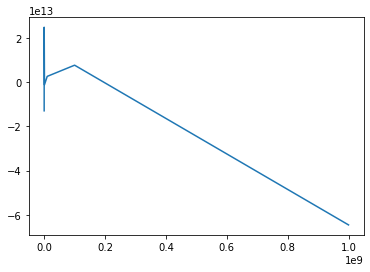

In [55]:
max_iter = np.array([10000, 100000, 1000000, 1e7, 1e8, 1e9])
predict = np.array([-1.30144833e+13, 2.47608347e+13, -1.23645388e+12, 2.54771214e+12,7.60691955e+12,-6.4594364e+13])
plt.plot(max_iter, predict);

## Random numbers

In [56]:
import numpy as np
from sklearn import linear_model
n_samples, n_features = 10, 5
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)
clf = linear_model.SGDRegressor()
clf.fit(X, y)

SGDRegressor()

In [57]:
X

array([[ 0.44634642, -1.36117141,  1.24196364, -0.6095424 ,  0.40530963],
       [-1.6986911 , -2.86285921,  0.58142772,  0.27925597, -0.26563348],
       [-1.38485722, -1.74237564, -1.11846279, -0.5751894 ,  0.19439057],
       [ 0.31147849, -0.38048811,  0.84798586, -1.12721059,  0.6950663 ],
       [ 1.78998074, -0.05508363, -0.57156626, -0.30803249,  0.0830568 ],
       [-0.66241606,  0.2795211 , -1.73583934,  2.05422785,  0.87063836],
       [ 2.00998044, -2.22671338, -0.21429892,  0.25282585, -0.31461423],
       [ 1.13768698, -0.05892544,  0.91187452,  0.17145489, -1.65216564],
       [-0.23254334, -0.19983607, -0.52315018, -0.4278799 , -1.10644198],
       [-0.68721415, -0.36895946, -0.83693354,  0.22397896, -0.10042027]])

In [58]:
y

array([-0.12568472, -0.69582857,  0.27272849, -0.31955474, -0.25771387,
        0.12436746,  0.76485899, -0.96979056,  0.44093485,  0.96718942])

The `fit()` method does all the training magic, resulting in a model we can use for prediction (in this case, predicting on one example):

In [59]:
features = np.random.randn(1, n_features)
features

array([[ 0.47476421, -0.86626485,  0.04687077,  1.16019561, -0.00998942]])

In [60]:
clf.predict(features)

array([0.00882539])

In addition to the `fit()` method, the SGDRegressor also provides a `partial_fit()` method, so that you can incrementally train on small batches of data. In fact, all learning algorithms that are compatible with standard optimisation algorithms like (stochastic) gradient decent, adam, RMSprop, and so on have this capability.

Out of curiosity, let’s see how long it takes to train on a single example using `partial_fit()`:

In [61]:
import numpy as np
from sklearn import linear_model
n_samples, n_features = 1, 500
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)
clf = linear_model.SGDRegressor()
import time
start_time = time.time()
clf.partial_fit(X, y)
elapsed_time = time.time() - start_time
print(elapsed_time)

0.0010004043579101562


That’s quite fast. In fact, if we were to put our SGDRegressor behind a REST API and train on an example each time an HTTP request was made, factoring in, say, 10ms for request processing, we could handle about 520 requests a second, or about 45 million requests a day.

## BRFSS

In [67]:
#import pandas as pd
df = pd.read_csv('BRFSS_2018_v2.csv')
df.head()

,income,exp,college,geog
0,68666.665724,11,1,AB
1,58200.564681,30,1,ON
2,57723.268424,30,1,QC
3,50434.512838,15,1,QC
4,33479.741603,8,1,ON


In [72]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
geog = label_encoder.fit_transform(df['geog'])
print(geog)

[0 2 3 ... 1 2 3]


In [74]:
#import numpy as np
#from sklearn import linear_model
y = df['income']
X = df.iloc[:,1:2+1]
print(X.head())
n_samples, n_features = y.shape[0], X.shape[1]
clf = linear_model.SGDRegressor()
clf.fit(X, y)

   exp  college
0   11        1
1   30        1
2   30        1
3   15        1
4    8        1


SGDRegressor()

In [79]:
features = np.random.randn(1, n_features)
print(features)
clf.predict(features)

[[ 1.07544559 -0.48806149]]


array([29054.91291858])

In [82]:
features = [[21, 1]]
clf.predict(features)

array([61044.733285])

In [81]:
features = [[21, 0]]
clf.predict(features)

array([56912.40001802])

Makes sense. Let's add a province.

In [102]:
#import numpy as np
#from sklearn import linear_model
y = df['income']
df['geog'] = geog
X = df.iloc[:,1:]
print(X.head())
n_samples, n_features = y.shape[0], X.shape[1]
clf = linear_model.SGDRegressor()
clf.fit(X, y)

   exp  college  geog
0   11        1     0
1   30        1     2
2   30        1     3
3   15        1     3
4    8        1     2


SGDRegressor()

In [103]:
X

,exp,college,geog
0,11,1,0
1,30,1,2
2,30,1,3
3,15,1,3
4,8,1,2
...,...,...,...
25316,3,1,3
25317,35,0,2
25318,17,1,1
25319,10,1,2


In [105]:
features = [[21, 0, 3]]
clf.predict(features)

array([60715.13552546])

In [106]:
features = [[21, 1, 3]]
clf.predict(features)

array([64868.32656218])